In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/meses_producao_custo.csv')

In [6]:
df

,Meses,litros,custo
0,Jan,20200,19000
1,Fev,16700,17000
2,Mar,14800,14000
3,Abr,16000,15000
4,Mai,12100,14000
5,Jun,13000,15000
6,Jul,11600,13000
7,Ago,15500,16000
8,Set,18900,18000
9,Out,20000,19000


In [7]:
df.corr()

,litros,custo
litros,1.000000,0.969993
custo,0.969993,1.000000


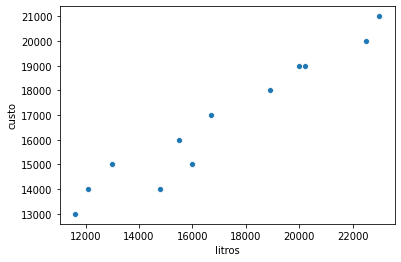

In [9]:
sns.scatterplot(df['litros'], df['custo'])
plt.show()

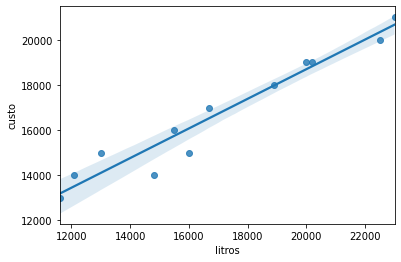

In [12]:
sns.regplot(df['litros'], df['custo'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


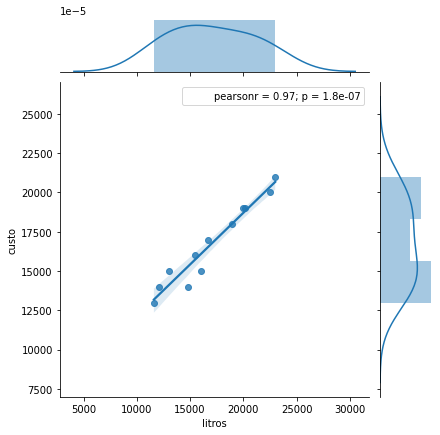

In [13]:
g = sns.jointplot(data=df, x='litros', y='custo', kind='reg')
g.annotate(stats.pearsonr)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


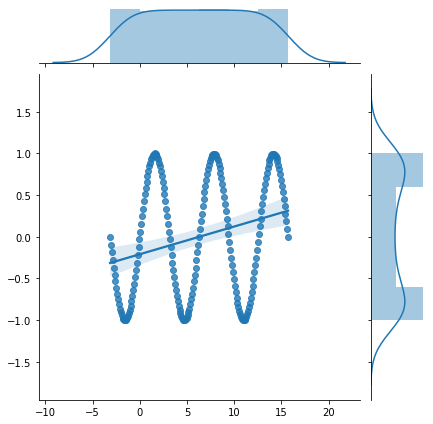

In [17]:
# Exemplo onde a correlação DE PEARSON não funciona:
x = np.linspace(-np.pi, 5*np.pi, 201) # Criando 200 pontos que variam de -pi e pi.
y = np.sin(x)
g2 = sns.jointplot(x=x, y=y, kind='reg')
g.annotate(stats.pearsonr)
plt.show()

In [18]:
df.corr(method='spearman') # Valores muito próximos ao de Pearson.

,litros,custo
litros,1.000000,0.970137
custo,0.970137,1.000000


In [19]:
# Relação entre variáveis categóricas: 
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


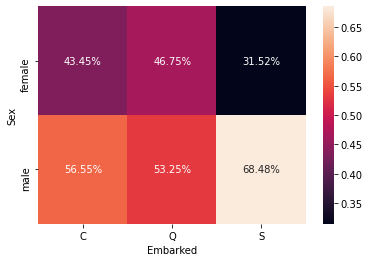

In [29]:
# Existe relação entre sexo e porto de embarque?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

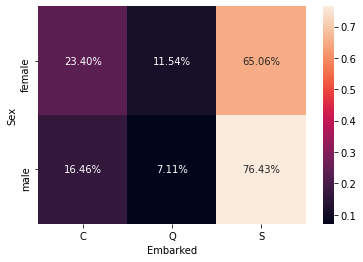

In [30]:
# Existe relação entre o porto de embarque para cada um dos sexos?
ctab = pd.crosstab(df['Sex'], df['Embarked'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

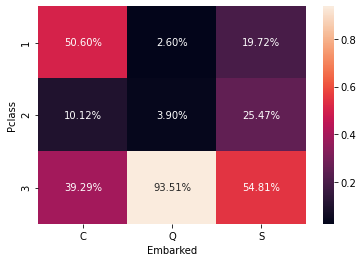

In [32]:
ctab = pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

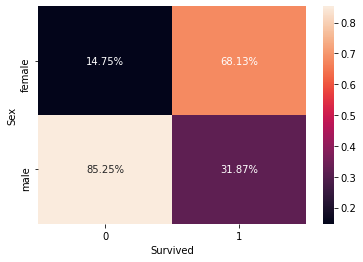

In [35]:
# Há relação entre sexo e sobrevivência?
ctab = pd.crosstab(df['Sex'], df['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

In [37]:
# Como podemos visualizar se dentre os homens os que mais sobreviveram eram crianças?
# Sugestão: Criar coluna nova(criança = Sim/Não, menos que 13 ou 12 anos).

Multicolinearidade:

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/ommlbd_familiar.csv', na_values=-9999)

In [44]:
df.head(2)

,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
0,23325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


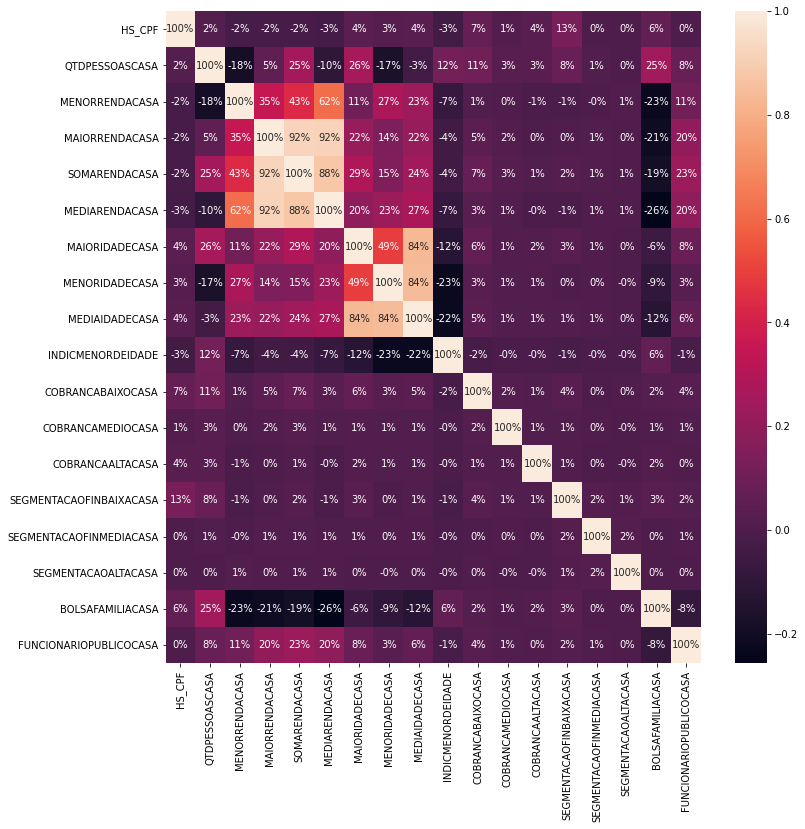

In [47]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 10

cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.0%')
plt.show()

In [57]:
# Vif
# Se o Vif é igual a 1, significa que a variável não possui correlação com as demais.
# Se o Vif > 5, então há uma correlação com várias outras variáveis.


#  Detalhe o Vif só é calculado se não houver valores faltantes.

# Dicas classificadores:
# Redes neurais, árvores de decisão, regressão logística não se beneficiam de poucas variáveis correlacionadas entre si.
# Emsembles -> random forest, xgboost se beneficiam de variáveis correlacionadas.
#                          (componentes aleatórias -> 'ignoram' correlações altas entre atributos.)

In [49]:
# Imputação:
# Substituir os valores faltantes pela média de cada coluna.
df.fillna(df.mean(), inplace=True)

In [52]:
# Função para cálculo de Vif:

def calc_vif(tabela):
    vif = pd.DataFrame()
    vif['Variaveis'] = tabela.columns
    vif['vif'] = [variance_inflation_factor(tabela.values, i) for i in range(tabela.shape[1])]
    return vif


In [54]:
calc_vif(df)
# Regressão Logística
# Vif não impacta o resultado da regressão logística.
# Mas, ao mesmo tempo remover variávies com Vif alto, torna a equação mais simples.

,Variaveis,vif
0,HS_CPF,3.412182
1,QTDPESSOASCASA,31.690786
2,MENORRENDACASA,9.118081
3,MAIORRENDACASA,54.022669
4,SOMARENDACASA,40.028290
5,MEDIARENDACASA,66.867885
6,MAIORIDADECASA,371.082940
7,MENORIDADECASA,121.033315
8,MEDIAIDADECASA,694.286178
9,INDICMENORDEIDADE,1.247177


In [55]:
# Remoção da coluna com maior Vif:
df.drop("MEDIAIDADECASA", axis=1, inplace=True)

In [58]:
calc_vif(df).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Variaveis,HS_CPF,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA
vif,3.40911,29.2641,9.10551,53.8876,40.0169,66.5979,49.7711,22.5504,1.24569,1.19098,1.0167,1.01021,1.19718,1.00422,1.00088,1.98684,1.74991
